<a href="https://www.kaggle.com/code/aadyadewangan/multiple-lr-cars?scriptVersionId=138537572" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [2]:
df = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/car data.csv')
df.sample(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
266,amaze,2014,3.65,7.00,35000,Petrol,Dealer,Manual,0
289,city,2016,10.11,13.60,10980,Petrol,Dealer,Manual,0
89,etios g,2014,4.75,6.76,40000,Petrol,Dealer,Manual,0
206,xcent,2017,5.75,7.13,12479,Petrol,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0
232,elantra,2015,11.45,14.79,12900,Petrol,Dealer,Automatic,0
155,Honda Activa 4G,2017,0.48,0.51,4300,Petrol,Individual,Automatic,0
249,i20,2016,5.25,7.60,17000,Petrol,Dealer,Manual,0
56,etios cross,2015,4.50,7.27,40534,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# EDA and Cleaning

In [3]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
df.shape

(301, 9)

In [5]:
df.corr()

/tmp/ipykernel_20/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [6]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
df.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
126,Bajaj Avenger 220,2017,0.90,0.95,1300,Petrol,Individual,Manual,0
22,sx4,2011,4.40,8.01,50000,Petrol,Dealer,Automatic,0
11,ciaz,2015,6.85,10.38,51000,Diesel,Dealer,Manual,0
248,i10,2013,4.00,4.60,30000,Petrol,Dealer,Manual,0
282,city,2014,8.25,14.00,63000,Diesel,Dealer,Manual,0


<Axes: xlabel='Kms_Driven', ylabel='Selling_Price'>

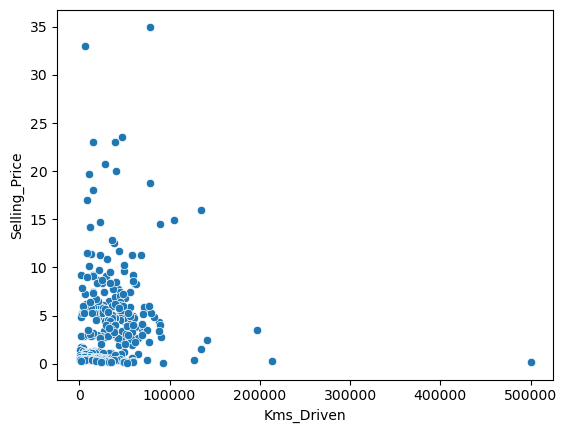

In [9]:
sns.scatterplot(data = df, x ='Kms_Driven', y = 'Selling_Price')

<Axes: >

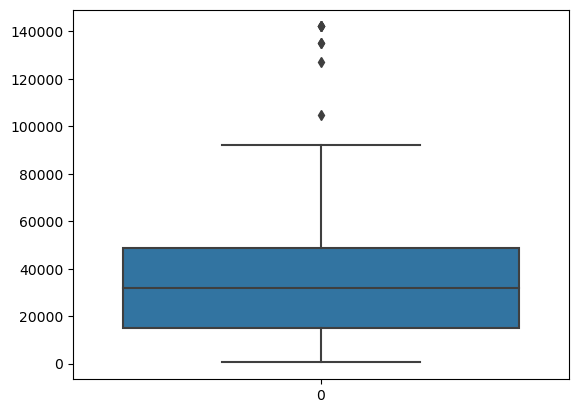

In [10]:
lim_km = df['Kms_Driven'].quantile(0.99)
df['Kms_Driven'] = np.where(df['Kms_Driven'] > lim_km , lim_km,df['Kms_Driven'])
sns.boxplot(df['Kms_Driven'])

In [11]:
outliers = df[df['Year'] > 2025]
outliers

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner


In [12]:
df.drop([179,196], inplace = True)

In [13]:
df.shape

(299, 9)

In [14]:
df.sample(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
54,innova,2005,2.75,10.21,90000.0,Petrol,Individual,Manual,0
1,sx4,2013,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
246,i20,2012,3.75,6.79,35000.0,Petrol,Dealer,Manual,0


In [15]:
df.drop(['Car_Name'], axis=1, inplace =True)

In [16]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    104
Name: Seller_Type, dtype: int64

In [17]:
df['Fuel_Type'] = np.where(df['Fuel_Type'] == 'Petrol' , 0 , 1)
df['Seller_Type'] = np.where(df['Seller_Type'] == 'Individual' , 0 , 1)
df['Transmission'] = np.where(df['Transmission'] == 'Manual' , 0 , 1)
df.sample(5)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
121,2011,1.05,1.50,6900.0,0,0,0,0
244,2013,5.95,9.40,49000.0,1,1,0,0
91,2014,11.25,16.09,58242.0,1,1,0,0
216,2016,2.90,4.43,12500.0,0,1,0,0
233,2013,3.90,5.70,53000.0,1,1,0,0


<Axes: xlabel='Kms_Driven', ylabel='Selling_Price'>

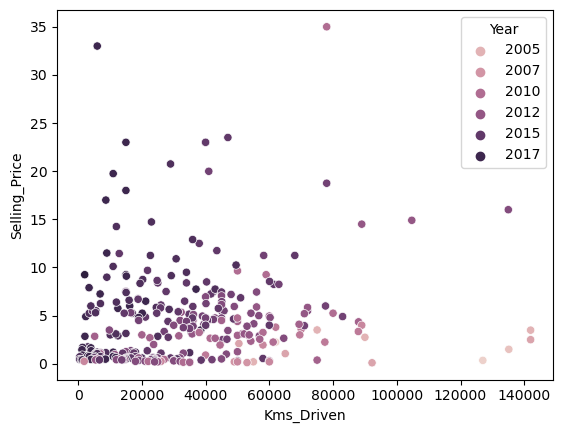

In [18]:
sns.scatterplot(data =df, x = 'Kms_Driven', y = 'Selling_Price', hue = 'Year')

<Axes: xlabel='Present_Price', ylabel='Selling_Price'>

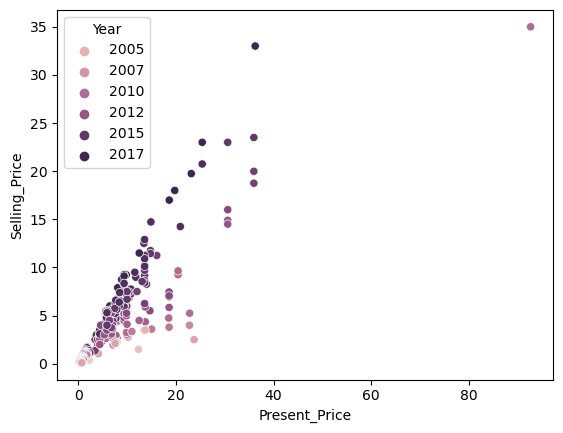

In [19]:
sns.scatterplot(data =df, x = 'Present_Price', y = 'Selling_Price', hue = 'Year')

In [20]:
#df.drop([86], inplace = True)

In [21]:
df['Present_Price'].skew()

4.0829329664084275

In [22]:
p_25 = df['Present_Price'].quantile(0.25)
p_75 = df['Present_Price'].quantile(0.75)
iqr = p_75-p_25
u_lim = p_75 + 1.5*iqr
df['Present_Price'] = np.where(df['Present_Price']>u_lim, u_lim, df['Present_Price'])

In [23]:
df['Present_Price'].skew()

0.9872256017189441

<Axes: xlabel='Selling_Price', ylabel='Density'>

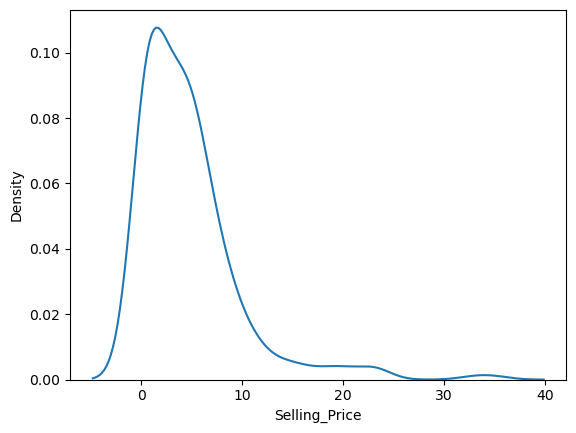

In [24]:
sns.kdeplot(df['Selling_Price'])

In [25]:
df['Selling_Price'].skew()

2.4911446194905498

In [26]:
 df[df['Selling_Price'] > df['Selling_Price'].quantile(0.98)]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
51,2015,23.0,22.755,40000.0,1,1,1,0
63,2015,23.5,22.755,47000.0,1,1,1,0
64,2017,33.0,22.755,6000.0,1,1,1,0
82,2017,23.0,22.755,15000.0,1,1,1,0
86,2010,35.0,22.755,78000.0,1,1,0,0
93,2015,23.0,22.755,40000.0,1,1,1,0


In [27]:
p25 = df['Selling_Price'].quantile(0.25)
p75 = df['Selling_Price'].quantile(0.75)
iqr = p75-p25
ulim = p75 + 1.5*iqr
df['Selling_Price'] = np.where(df['Selling_Price']>ulim, ulim, df['Selling_Price'])

In [28]:
df['Selling_Price'].skew()

0.9674003399020579

# The Model

In [29]:
from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [30]:
x = df[['Year', 'Present_Price', 'Fuel_Type' , 'Seller_Type', 'Transmission', 'Owner']]
y = df['Selling_Price']

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)

In [32]:
lr = LinearRegression()
test = lr.fit(x_train,y_train)
y_hat = lr.predict(x_test)

In [33]:
lr.intercept_

-747.8577864923392

In [34]:
lr.coef_

array([ 0.37148052,  0.45789022,  1.23861211,  1.03020286,  0.07160423,
       -0.75119455])

In [35]:
#skfold = StratifiedKFold()
#cv = cross_val_score(test, x, y)


In [36]:
mse = mean_squared_error(y_test, y_hat)
mae = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
r2 = r2_score(y_test,y_hat)
ad_r2 = 1 - ((1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-1-x_test.shape[1]))

In [37]:
metrics = {'MSE' : mse, 'MAE' : mae, 'RMSE': rmse, 'R2 Score' : r2, 'Adjusted R2' : ad_r2}
metrics

{'MSE': 2.016333512016132,
 'MAE': 2.016333512016132,
 'RMSE': 1.419976588545083,
 'R2 Score': 0.8327977085335907,
 'Adjusted R2': 0.8138691472355066}